In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

aapl = yf.Ticker("AAPL")
df = aapl.history(period="max")
# filter df from start date 2020-01-01
df = df[df.index >= '2010-01-01']

#df to dict
df_dict = df.to_dict()

# all items from df_dict["Close"] to list
close_list = list(df_dict["Close"].values())

# get last traded price
last_price = close_list[-1]

In [ ]:
def pct_change(series):
    # Create an empty list to store the percentage changes
    pct_changes = []
    
    # Iterate through the elements in the series
    for i in range(1, len(series)):
        # Calculate the percentage change between the current element and the previous element
        pct_change = (series[i] - series[i-1]) / series[i-1]
        
        # Append the percentage change to the list
        pct_changes.append(pct_change)
        
    # Return the list of percentage changes
    return pct_changes


def standard_deviation(series):
    # Calculate the mean of the series
    mean = sum(series) / len(series)
    
    # Create a list of the differences between each element and the mean
    differences = [(x - mean) ** 2 for x in series]
    
    # Calculate the variance by dividing the sum of the differences by the length of the series
    variance = sum(differences) / len(series)
    
    # Calculate the standard deviation by taking the square root of the variance
    std_dev = variance ** 0.5
    
    # Return the standard deviation
    return std_dev

In [140]:
returns = pct_change(close_list)
vola = standard_deviation(returns)

num_sim = 1000
num_days = 252*11
sim_array = []

for x in range(num_sim):
    price_series = []
    count = 0
    
    price = last_price * (1 + np.random.normal(0, vola))    
    price_series.append(price)

    while count < num_days - 1:
        price = price_series[count] * (1 + np.random.normal(0, vola))
        price_series.append(price)
        count += 1
    sim_array.append(price_series)



In [141]:
"""
    Non-HPC part
"""

# sim to df_sim, first dimension is columns, second dimension is rows
df_sim = pd.DataFrame(sim_array).T

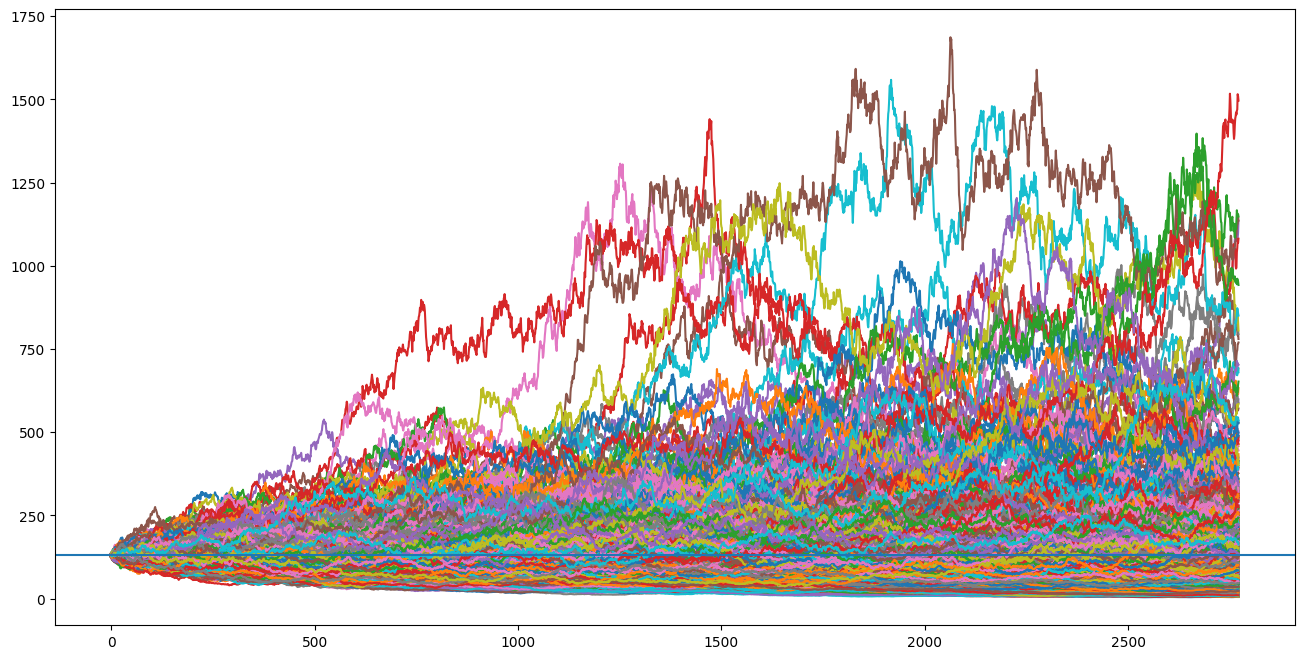

In [142]:
plt.figure(figsize=(16, 8))
plt.plot(df_sim)
plt.axhline(last_price)
plt.show()